In [243]:
import csv
import numpy as np
import pymzml
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Data processing - From csv to ml input

In [244]:
precision = 0.005
data_per_sec = 2
number_ticks = 240
half_time_window = 60 #sec
 
data_train = './train.csv'
data_test = './test.csv'
data_mz_path = "./clarkii T0I1.mzML"

data_train2 = './train2.csv'
data_test2 = './test2.csv'

In [245]:
def get_data_mz(data_mz ,mz , retention_time):
    
    run = pymzml.run.Reader(data_mz)
    
    data = []
    
    ticks_processed = 0
    
    for i, scan in enumerate(run):
        
        if scan.ms_level == 1:

            t, measure = scan.scan_time  # get scan time

            if t >= (retention_time-half_time_window):
                
                ticks_processed +=1
                
                mz_in_range = []
                for d in scan.peaks('raw'):
                    mz_scan = d[0]
                    i_scan = d[1]
                    
                    if mz_scan >= mz - precision  and mz_scan <= mz + precision:
                        mz_in_range.append(i_scan)
                        
                if not mz_in_range:
                    data.append(0)
                else:
                    data.append(mz_in_range[0])
                    
                if ticks_processed == number_ticks:
                    break
                                
    return data
    



In [246]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    

    if window_len<3:
        return x




    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [265]:
def NormalizeData(data):
    if np.max(data) - np.min(data) == 0.0:
        print('ERROR')
        return data
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def build_data_ml(path):
    
    X_ = []
    y_ = []
    
    
    
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=';')
        for line in list(reader):
            X_train_item = get_data_mz(data_mz_path, float(line[1]), float(line[2])*60)
            y_.append(1 if line[6] == 'YES' else 0)   
            
            xp = [i for i in range(0,len(X_train_item))]
            fp = [i for i in range(0,len(X_train_item))]
            X_train_interp = smooth(X_train_item,window='hanning')  #'flat', 'hanning', 'hamming', 'bartlett', 'blackman'          
            X_train_norm = NormalizeData(X_train_interp)
            X_.append(X_train_norm)
            
            #plt.plot(X_train_item)
            #plt.plot(X_train_interp)
            plt.title(line[6] + ' ' + line[1] + '/' + str(float(line[2])*60))
            plt.plot(X_train_norm)
            plt.plot(NormalizeData(X_train_item))
            plt.show()     
            
    return X_, y_
        

## Build training set

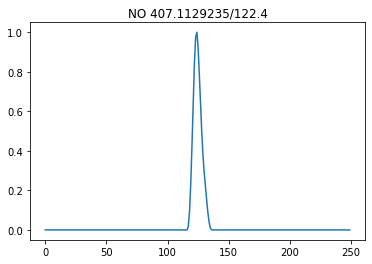

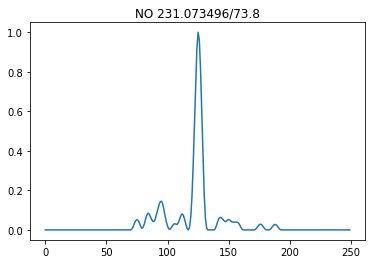

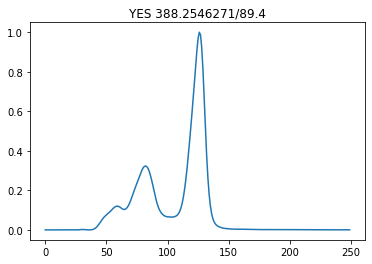

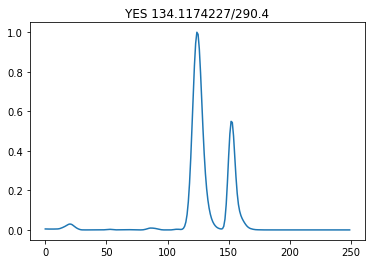

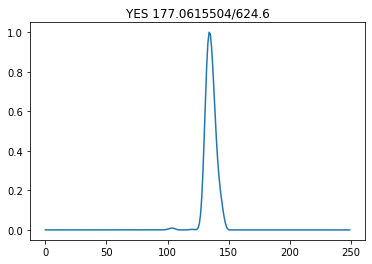

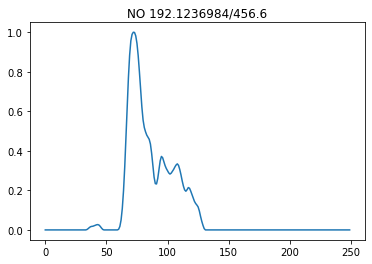

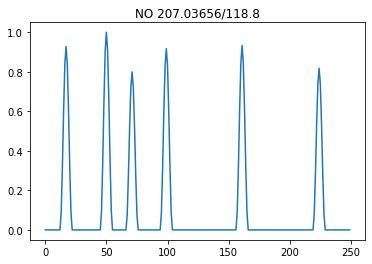

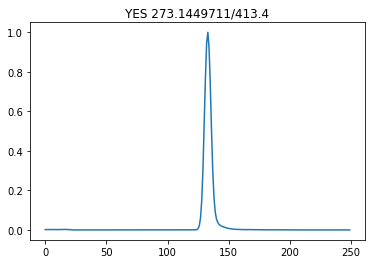

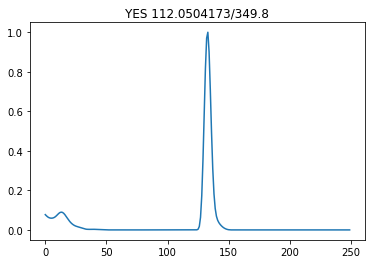

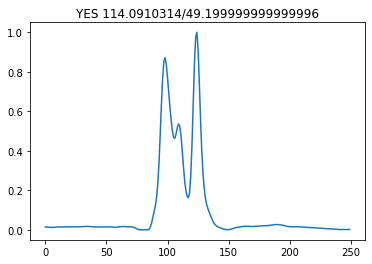

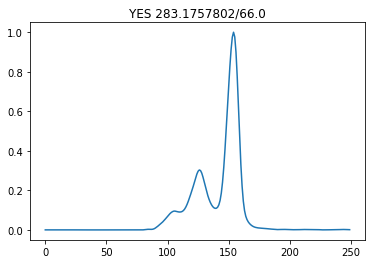

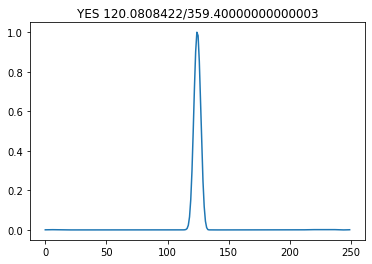

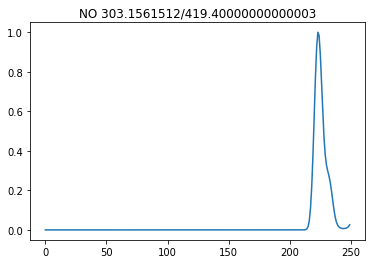

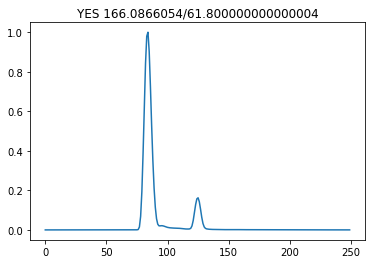

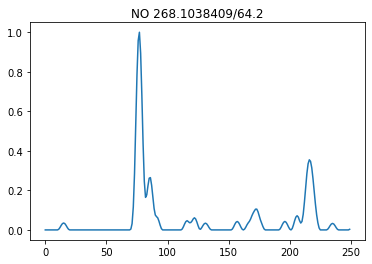

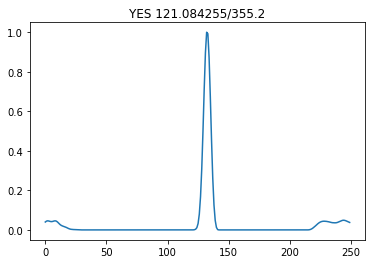

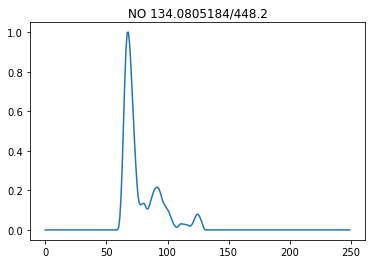

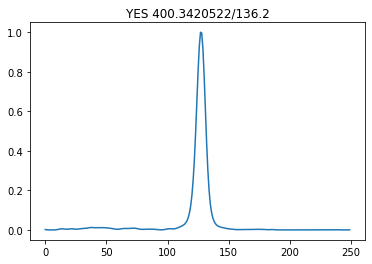

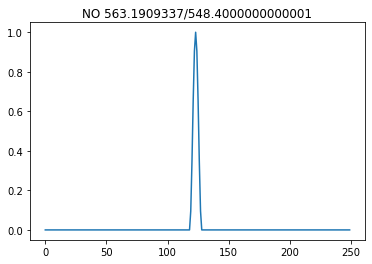

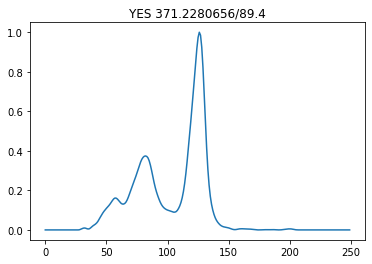

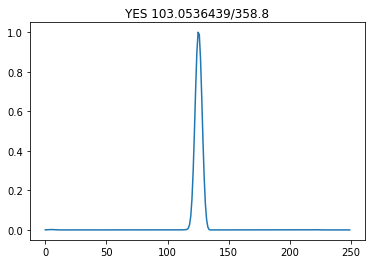

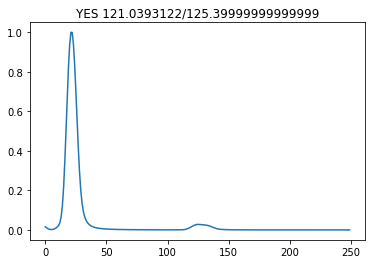

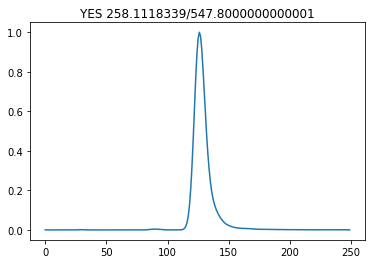

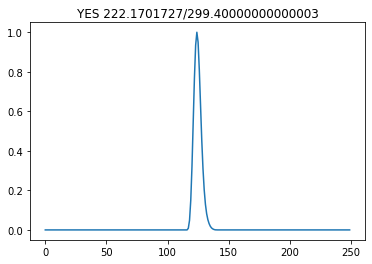

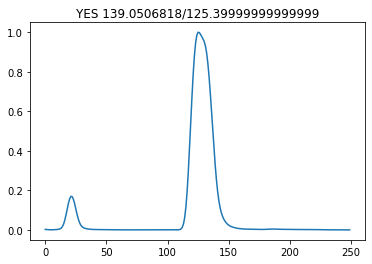

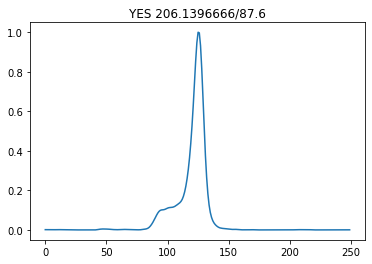

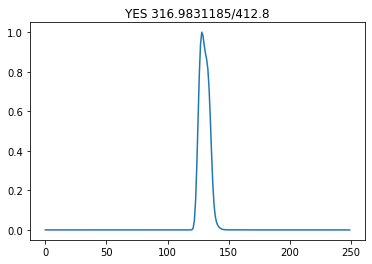

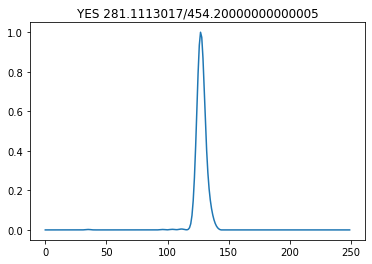

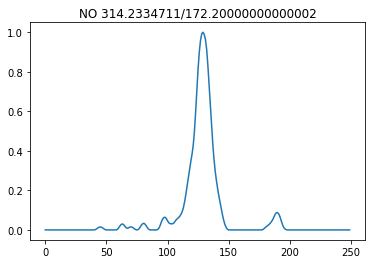

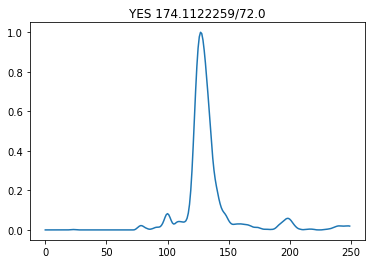

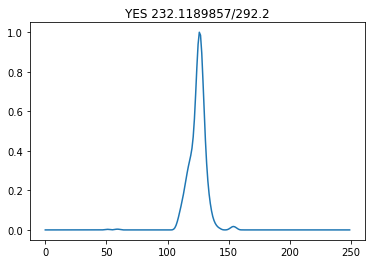

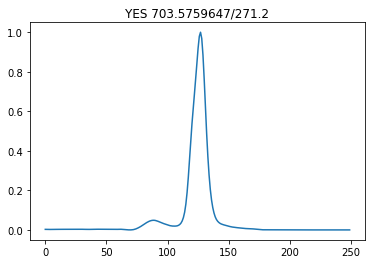

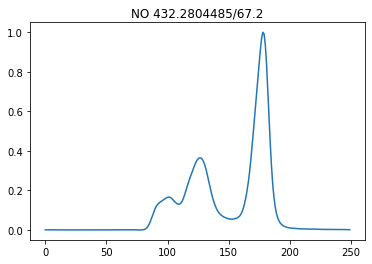

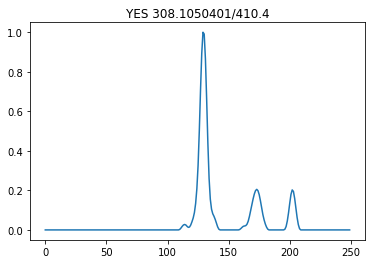

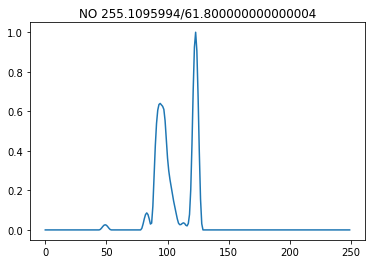

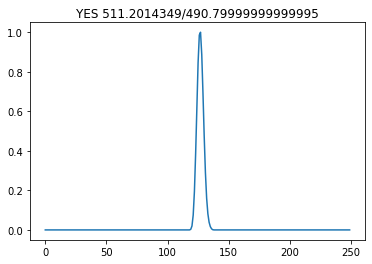

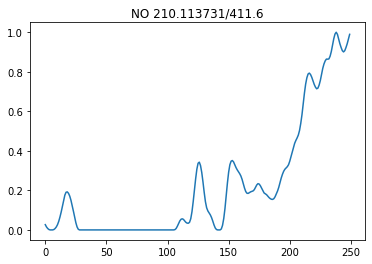

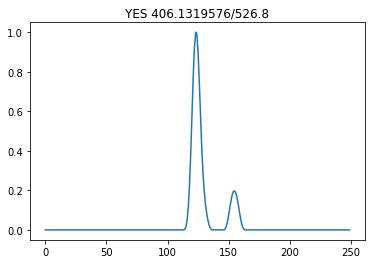

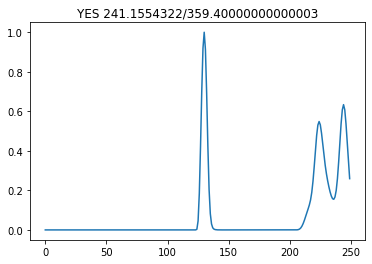

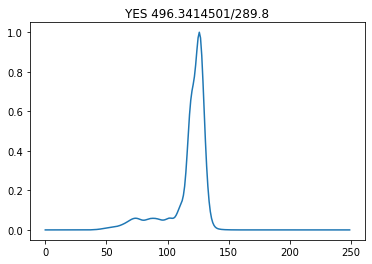

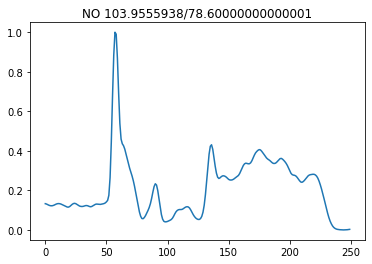

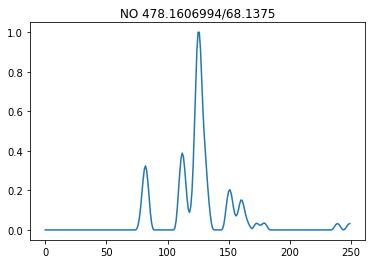

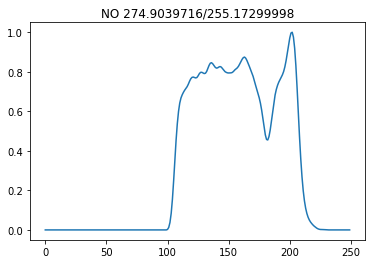

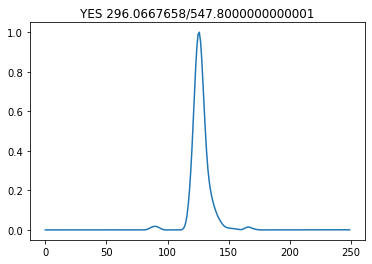

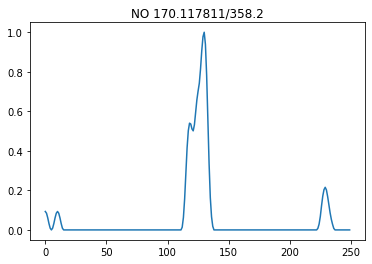

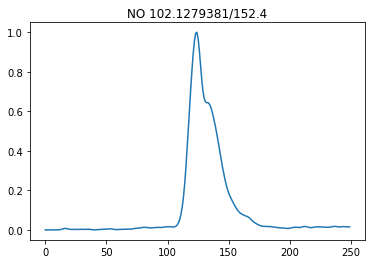

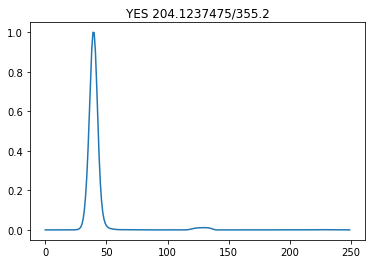

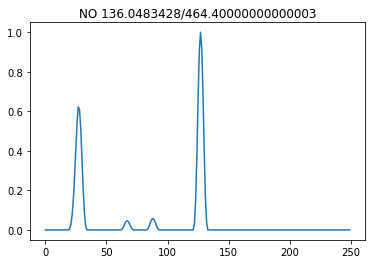

ERROR


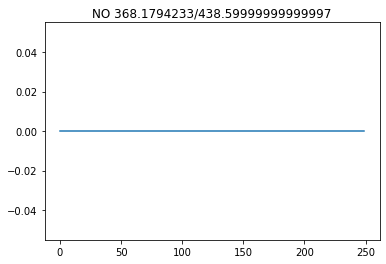

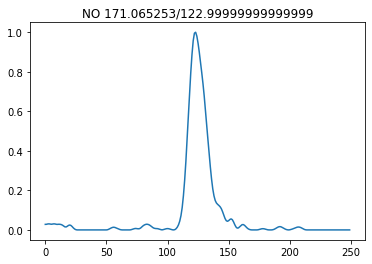

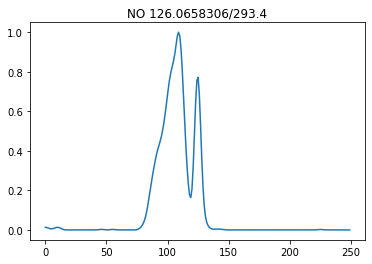

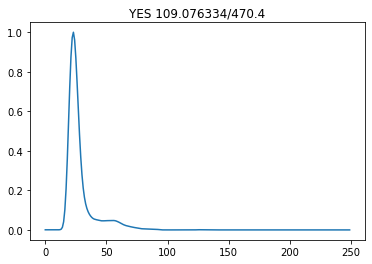

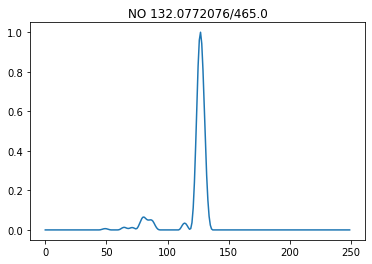

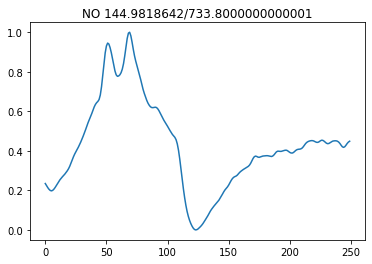

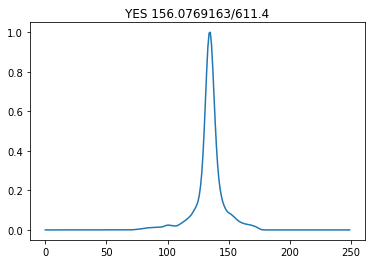

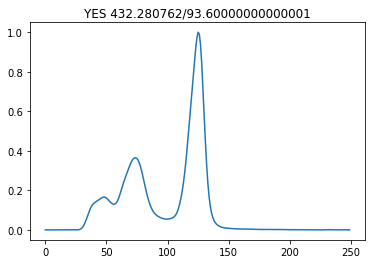

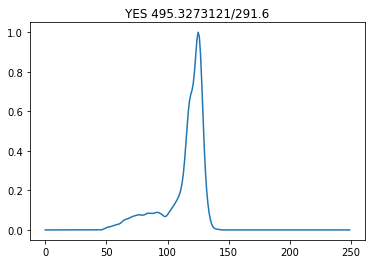

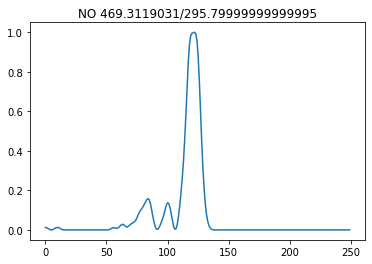

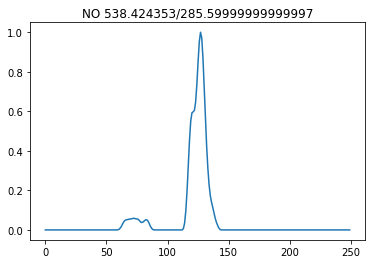

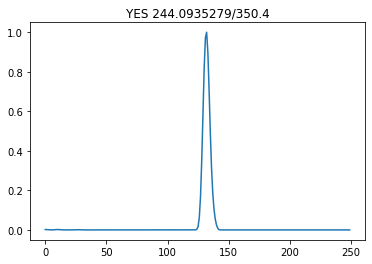

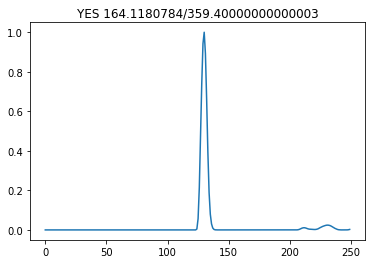

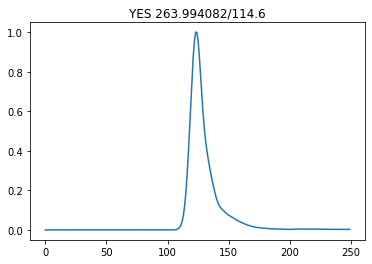

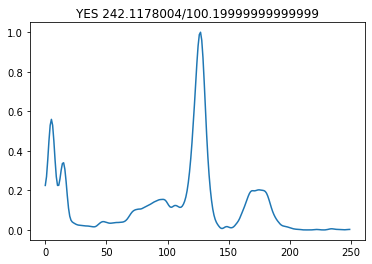

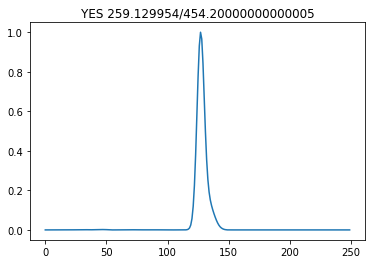

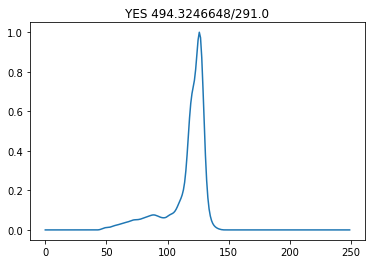

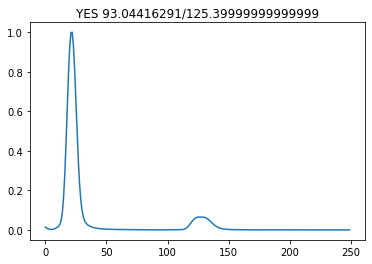

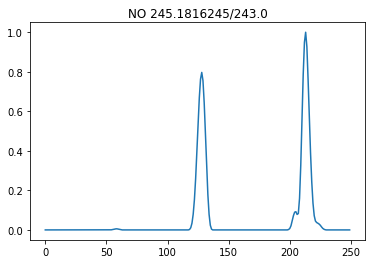

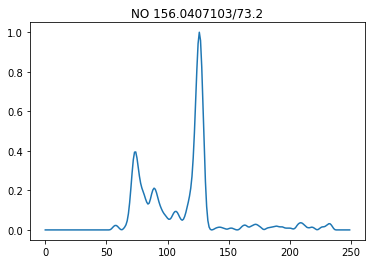

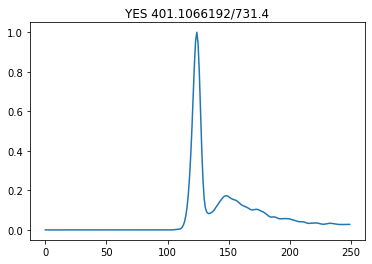

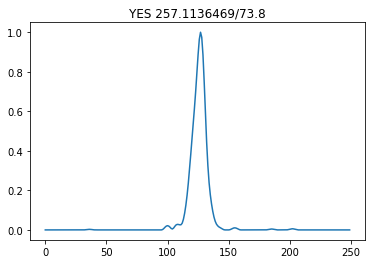

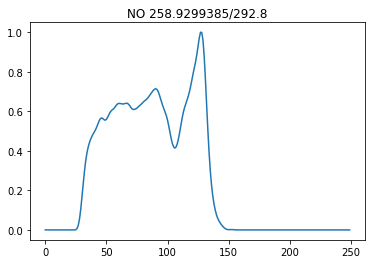

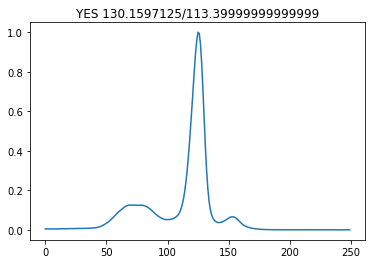

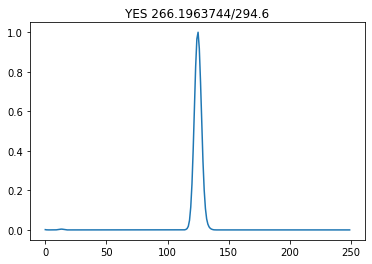

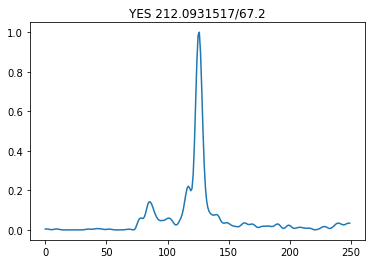

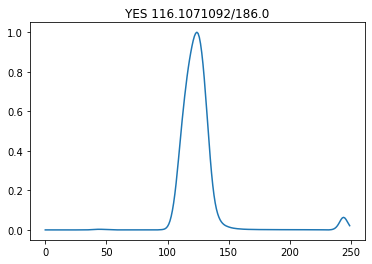

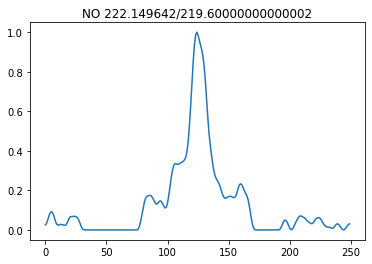

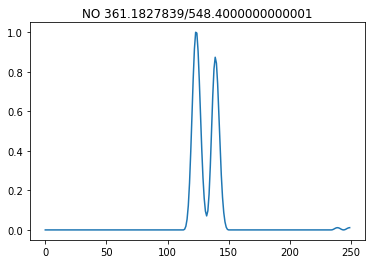

ERROR


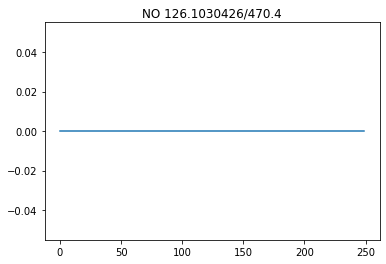

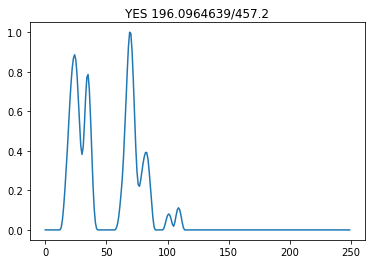

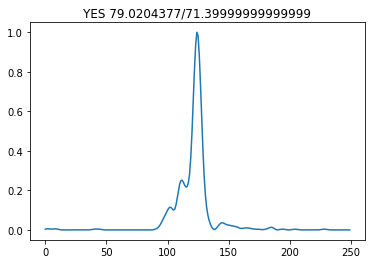

ERROR


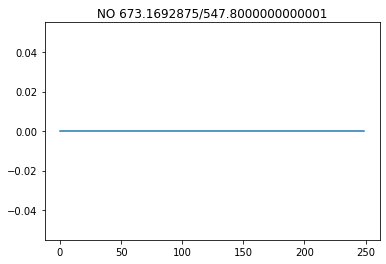

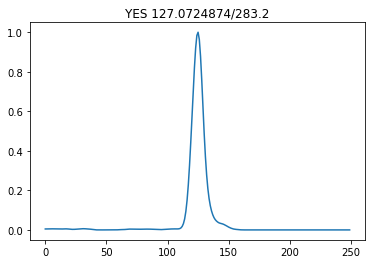

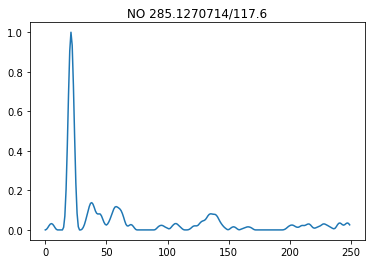

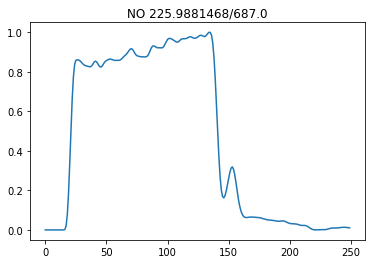

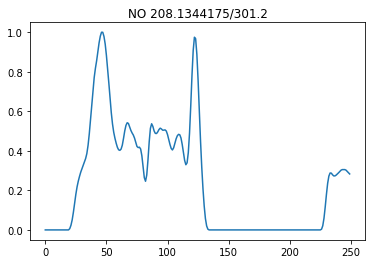

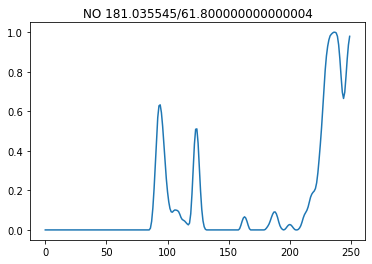

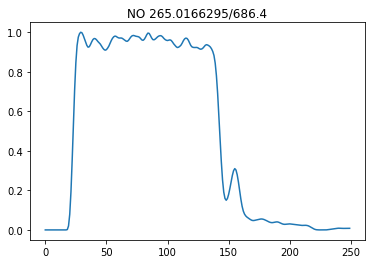

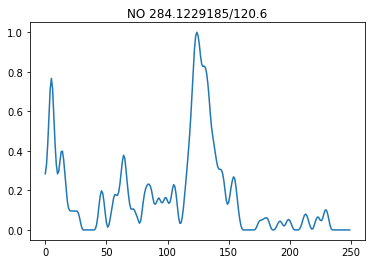

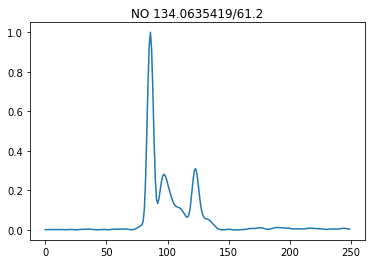

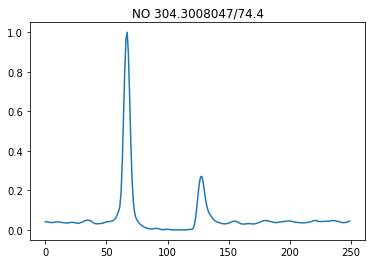

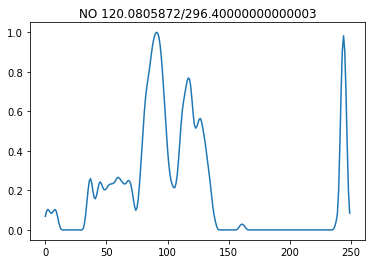

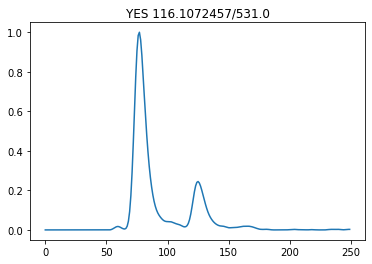

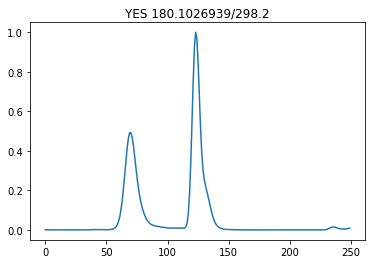

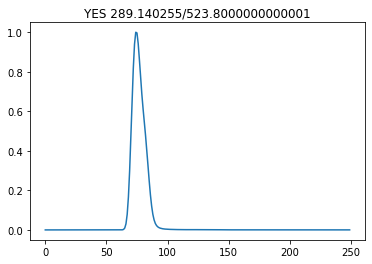

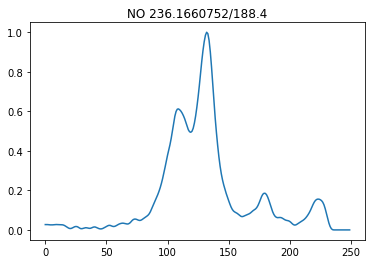

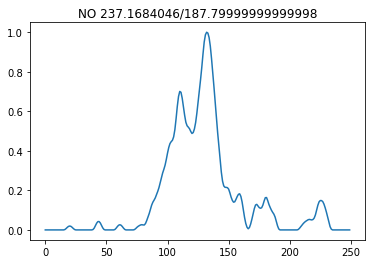

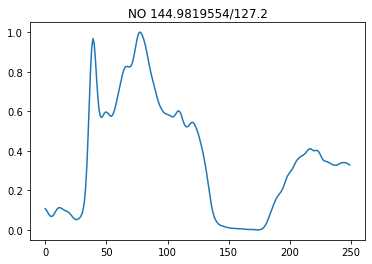

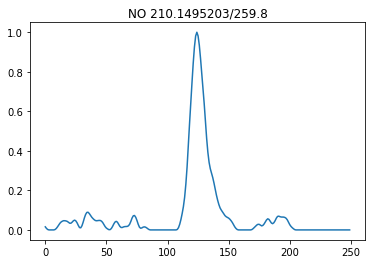

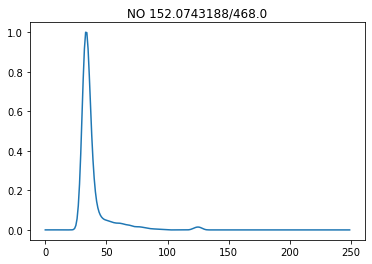

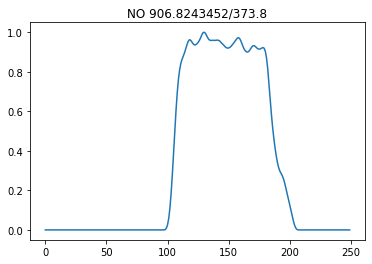

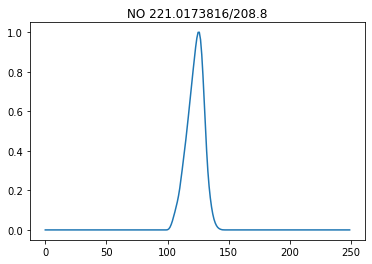

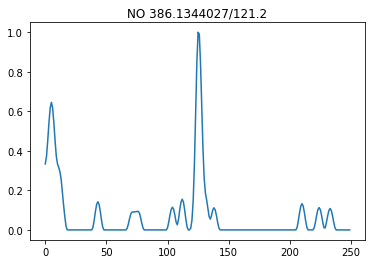

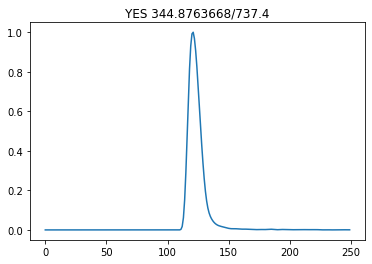

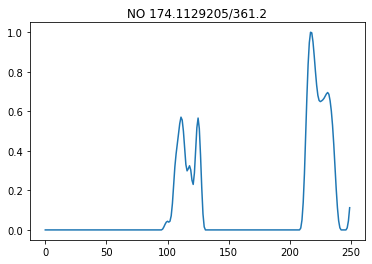

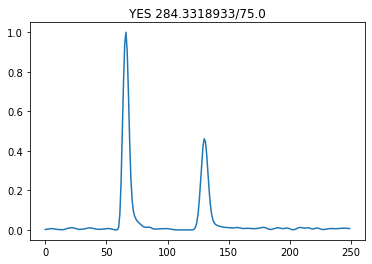

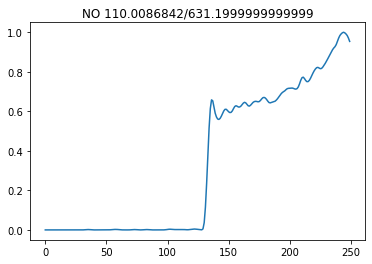

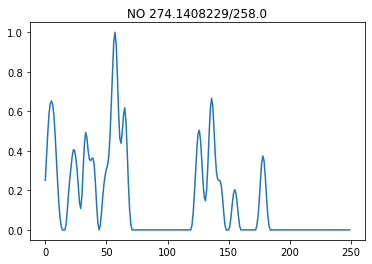

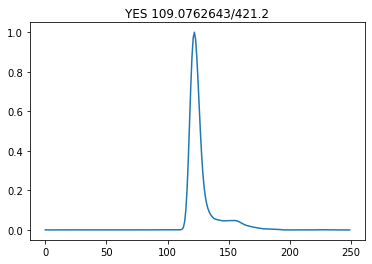

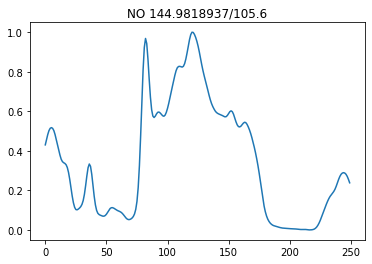

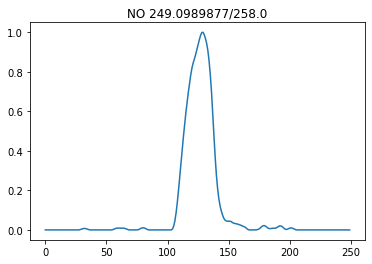

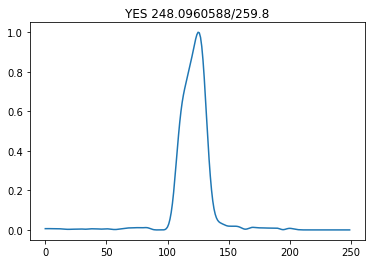

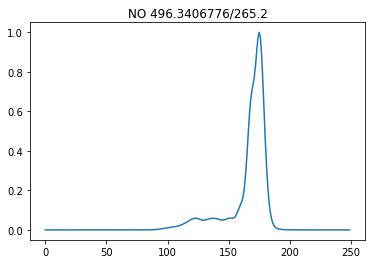

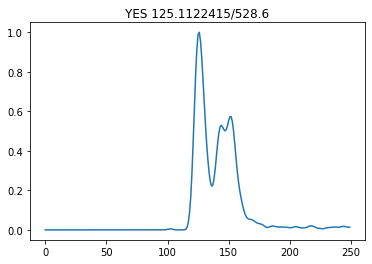

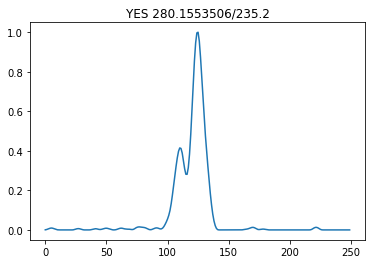

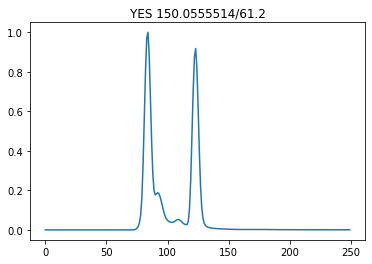

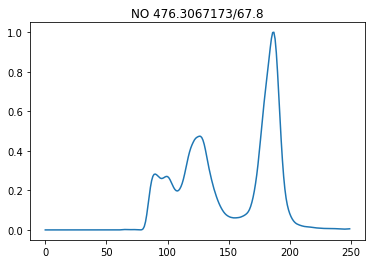

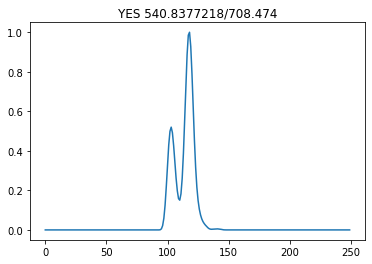

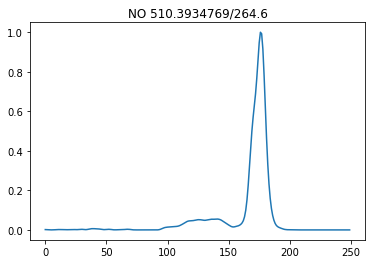

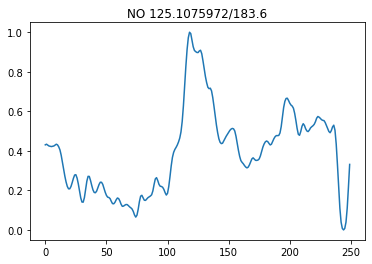

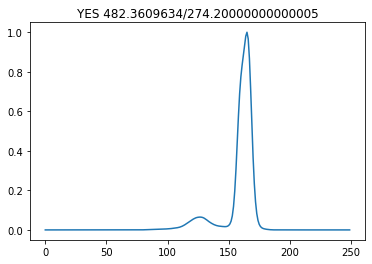

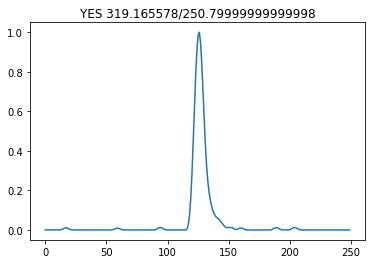

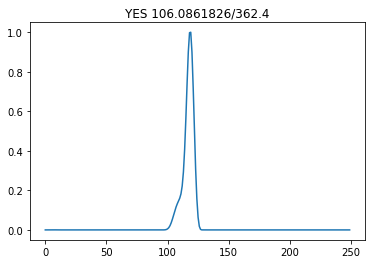

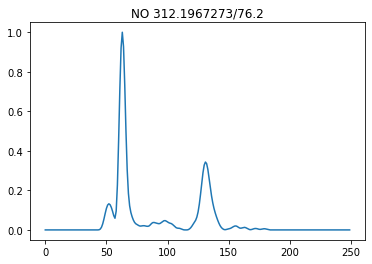

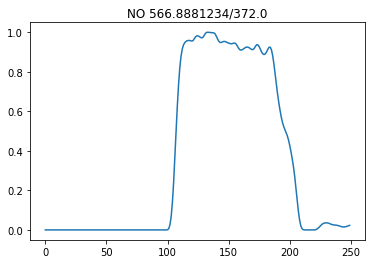

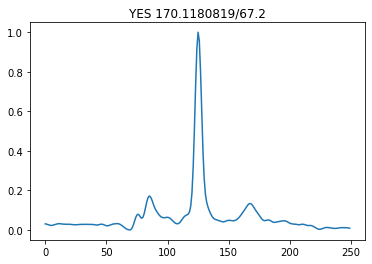

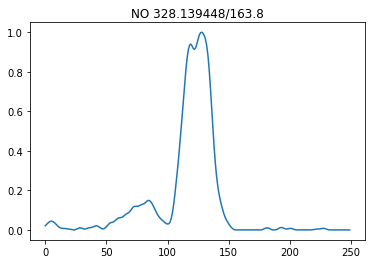

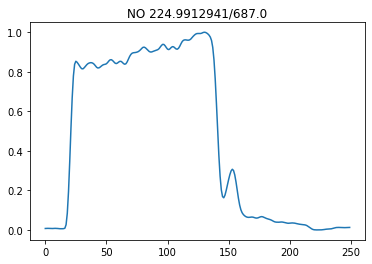

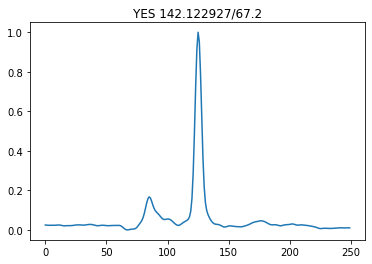

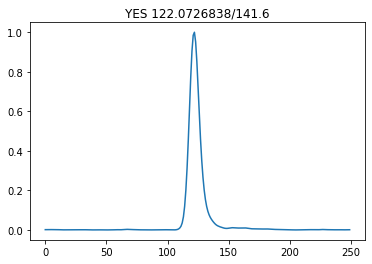

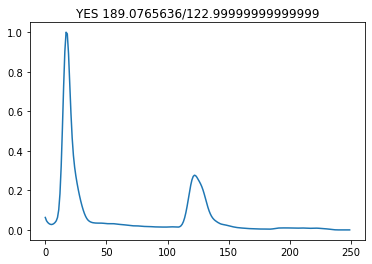

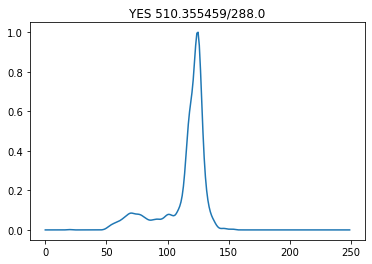

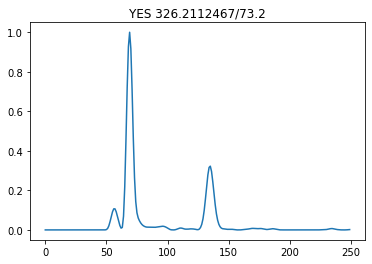

ERROR


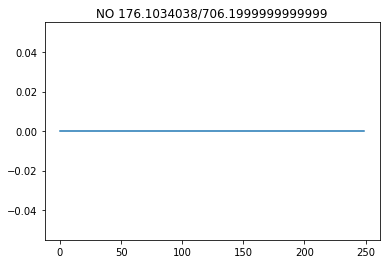

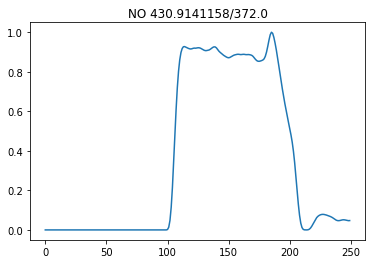

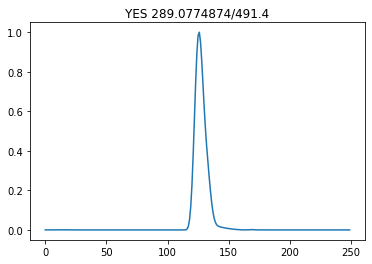

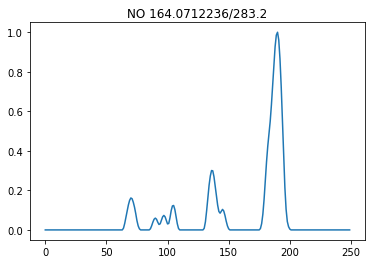

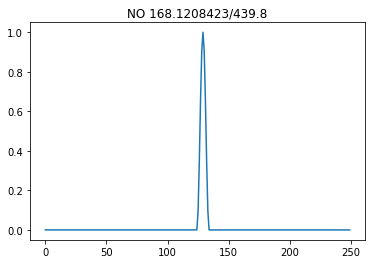

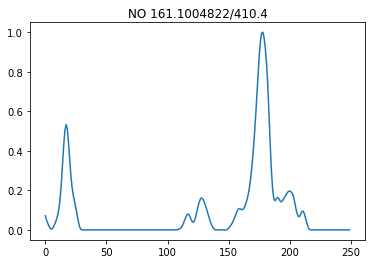

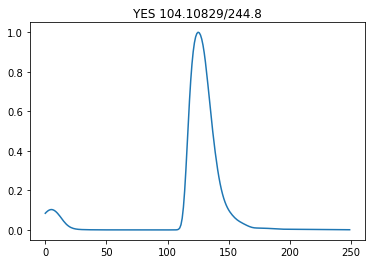

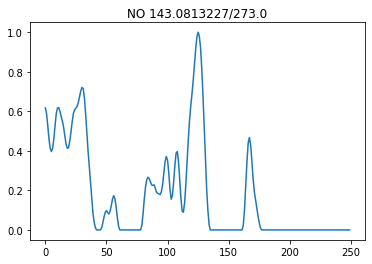

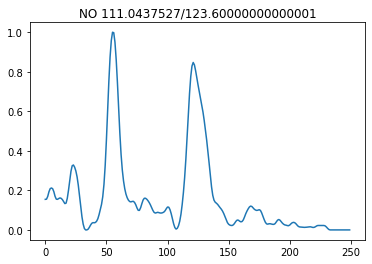

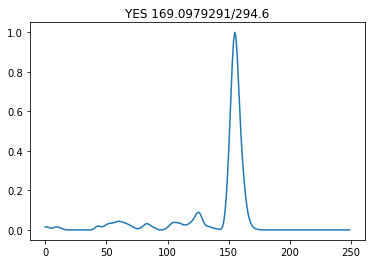

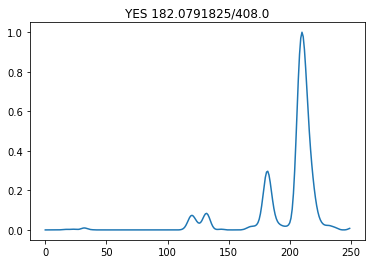

ERROR


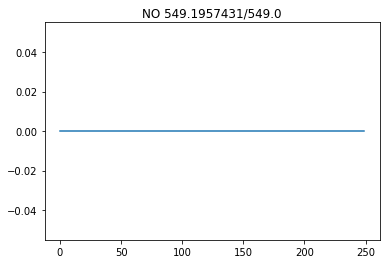

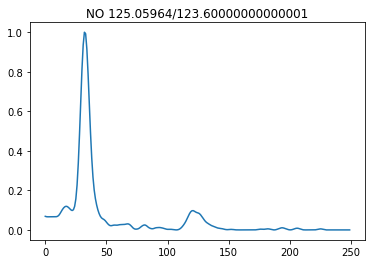

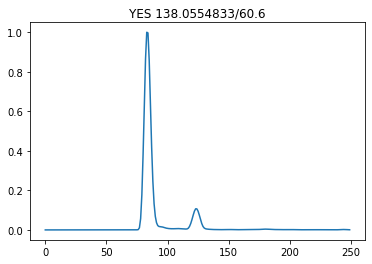

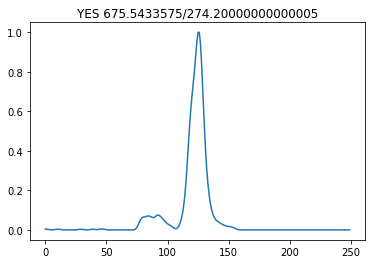

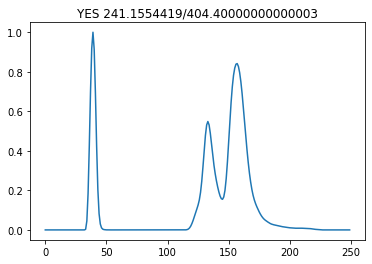

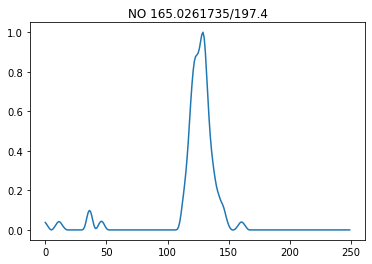

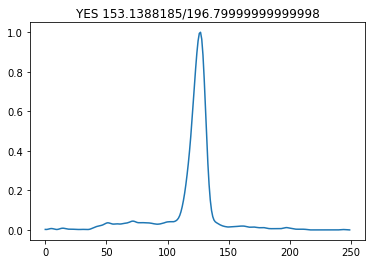

In [257]:
(X_train, y_train) = build_data_ml(data_train2)

## Build test set

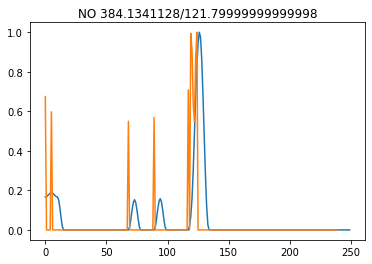

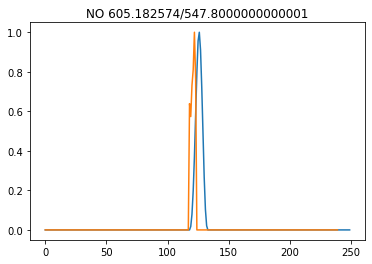

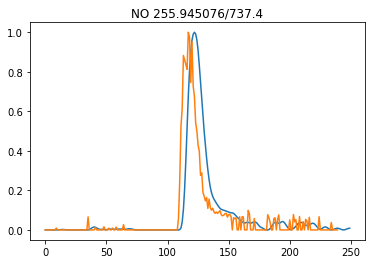

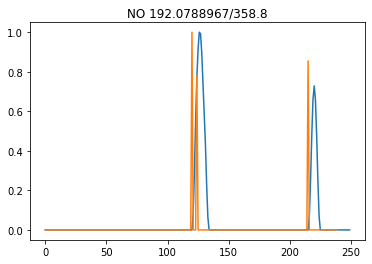

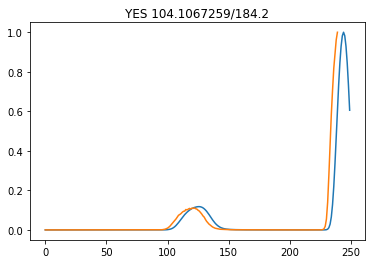

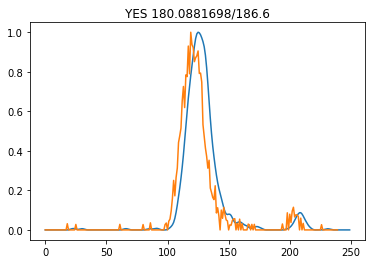

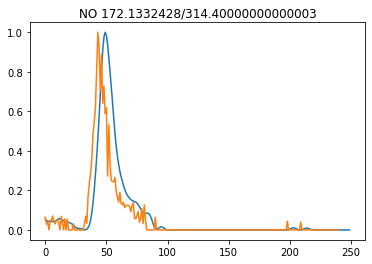

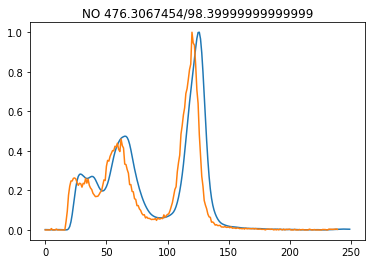

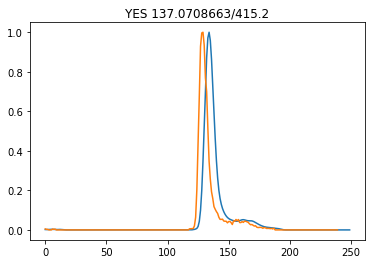

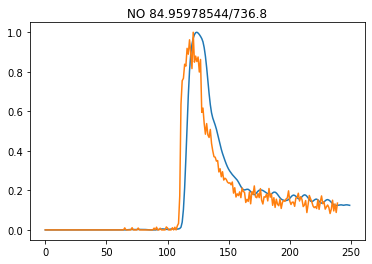

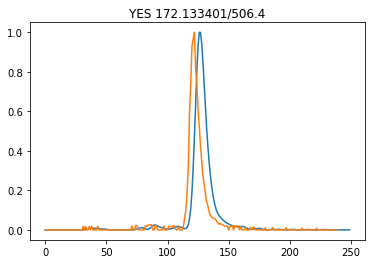

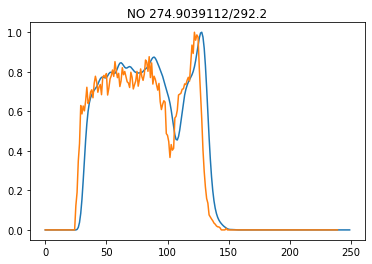

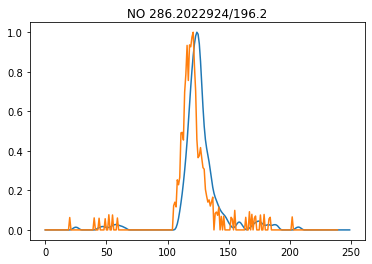

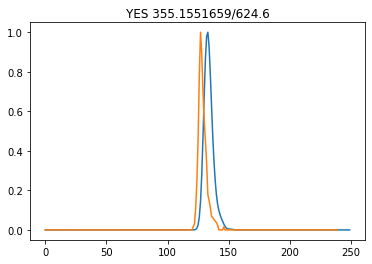

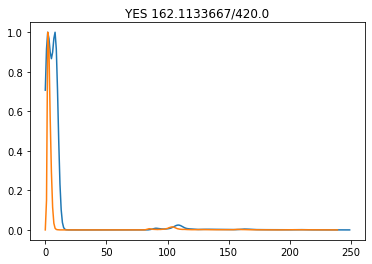

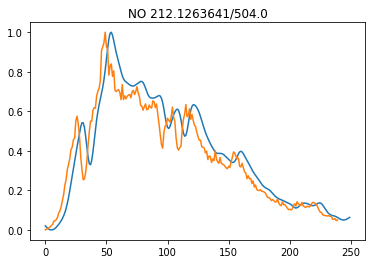

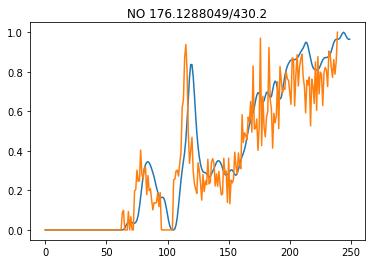

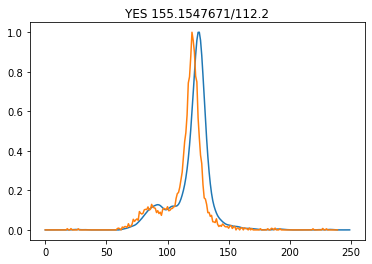

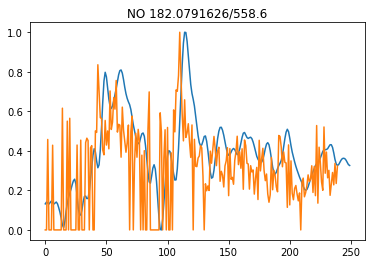

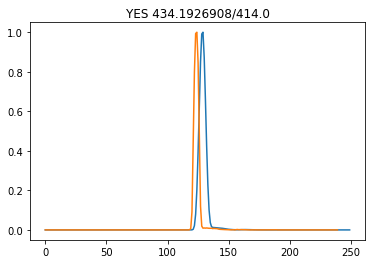

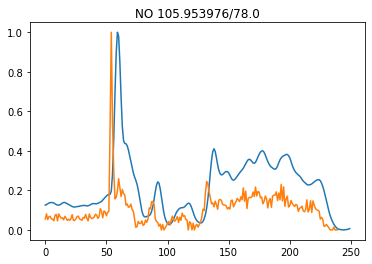

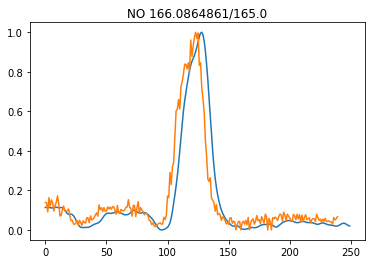

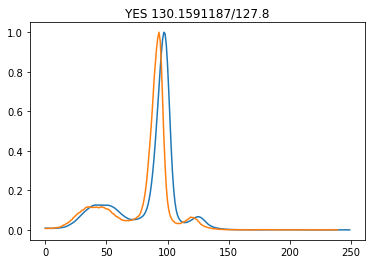

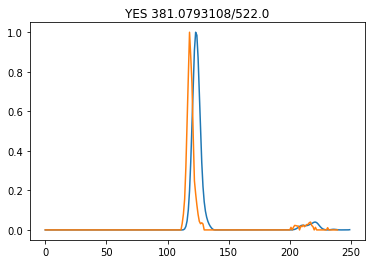

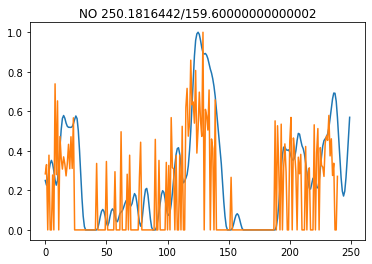

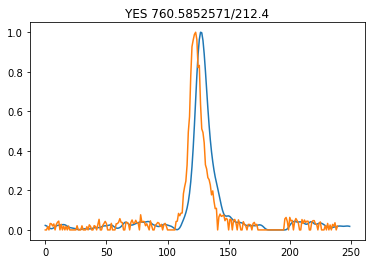

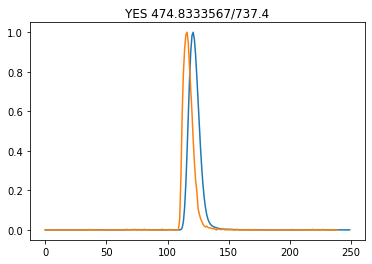

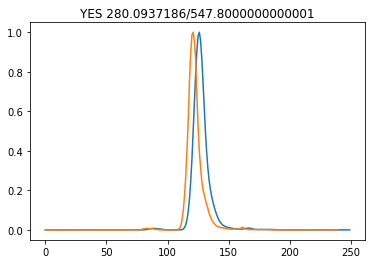

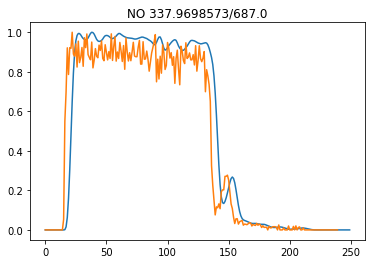

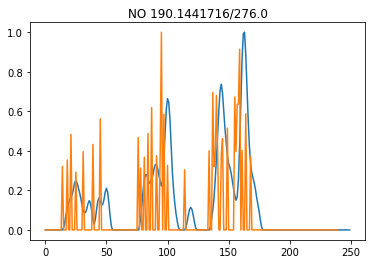

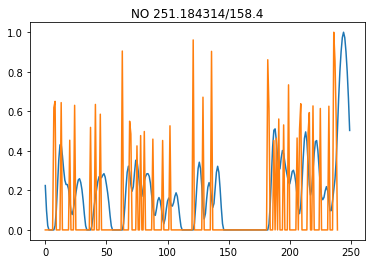

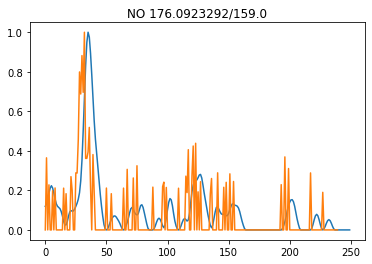

ERROR
ERROR


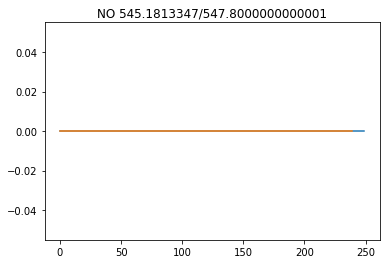

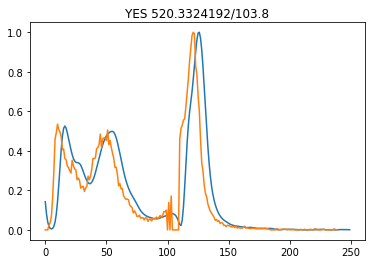

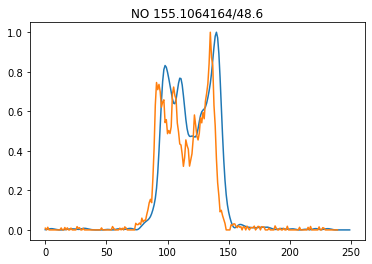

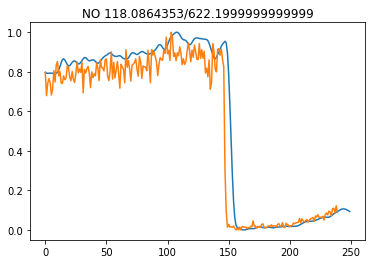

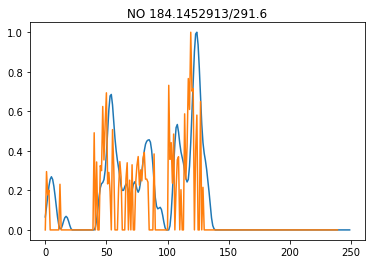

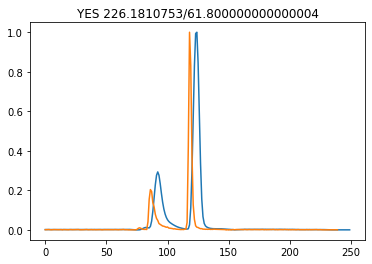

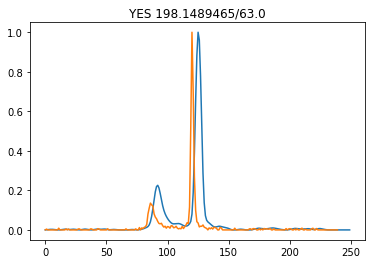

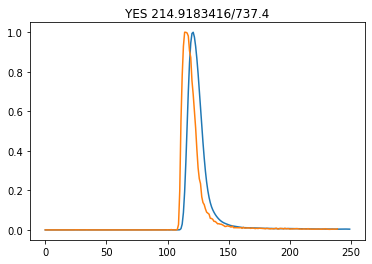

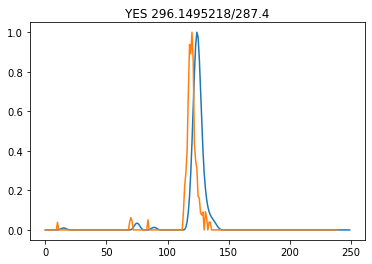

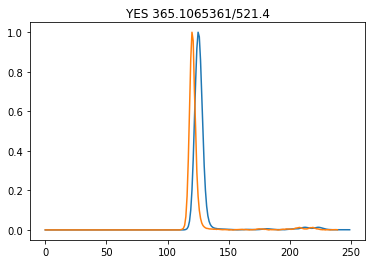

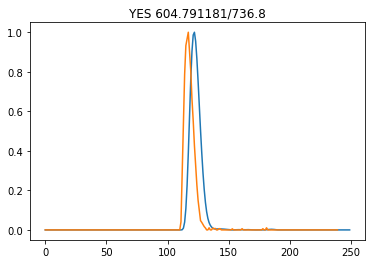

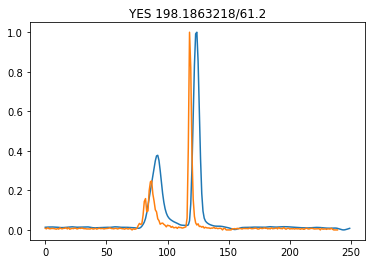

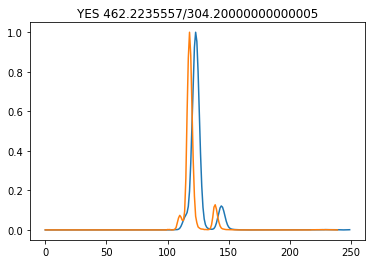

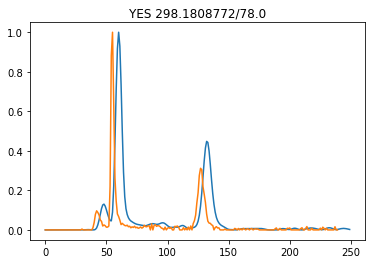

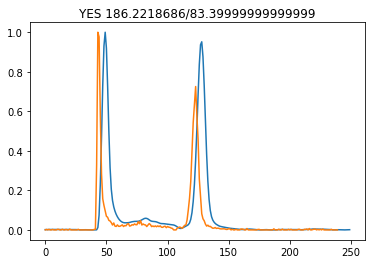

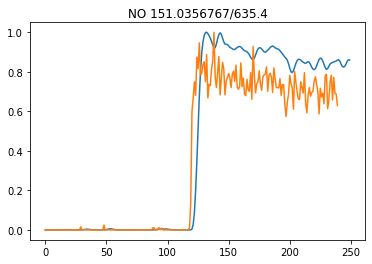

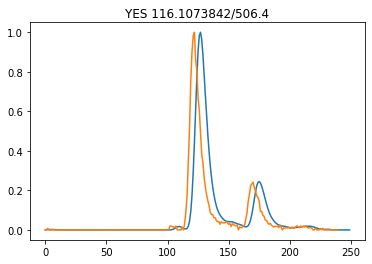

In [266]:
(X_test, y_test) = build_data_ml(data_test2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


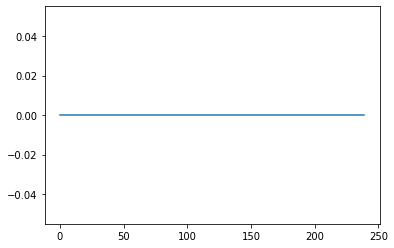

In [250]:
# to inpect single peak at time
c = get_data_mz(data_mz_path, 126.1030426, 470.4)
print(c)
plt.plot(c)
plt.show()

In [368]:
import numpy
from keras.models import Sequential , Model
from keras.layers import Dense
from keras.layers import LSTM, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import tensorflow as tf
import keras

# ML

## Set Model

In [410]:
model = None
inputvec = Input(shape=(240,1))
lstm = LSTM(10, activation="tanh",return_sequences = False , return_state = True, go_backwards = True )
whole_seq_output,final_memory_state, final_carry_state = lstm(inputvec)
output = Dense(2)(final_memory_state)
final = Dense(1,activation = 'sigmoid')(output)
model = Model( inputs = inputvec , outputs = final)

opt = tf.keras.optimizers.RMSprop( learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_73 (InputLayer)       [(None, 240, 1)]          0         
                                                                 
 lstm_72 (LSTM)              [(None, 10),              480       
                              (None, 10),                        
                              (None, 10)]                        
                                                                 
 dense_144 (Dense)           (None, 2)                 22        
                                                                 
 dense_145 (Dense)           (None, 1)                 3         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


## Train model

In [411]:
x = sequence.pad_sequences(X_train, maxlen=240) # 150 items
model.fit(x, np.array(y_train), epochs=2000, batch_size=50)

Epoch 1/2000
3/3 [==============================] - 3s 115ms/step - loss: 0.6934 - accuracy: 0.4067
Epoch 2/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6932 - accuracy: 0.5200
Epoch 3/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.6931 - accuracy: 0.5200
Epoch 4/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6931 - accuracy: 0.5200
Epoch 5/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6930 - accuracy: 0.5200
Epoch 6/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6930 - accuracy: 0.5200
Epoch 7/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.6930 - accuracy: 0.5200
Epoch 8/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6929 - accuracy: 0.5200
Epoch 9/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.6928 - accuracy: 0.5200
Epoch 10/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.6929 - accuracy: 0.5200

3/3 [==============================] - 0s 110ms/step - loss: 0.6923 - accuracy: 0.5200
Epoch 83/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6923 - accuracy: 0.5200
Epoch 84/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.6923 - accuracy: 0.5200
Epoch 85/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.6925 - accuracy: 0.5200
Epoch 86/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6924 - accuracy: 0.5200
Epoch 87/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.6924 - accuracy: 0.5200
Epoch 88/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6926 - accuracy: 0.5200
Epoch 89/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.6924 - accuracy: 0.5200
Epoch 90/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6927 - accuracy: 0.5200
Epoch 91/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6924 - accuracy: 0.5200
Epoch 

3/3 [==============================] - 0s 106ms/step - loss: 0.6921 - accuracy: 0.5200
Epoch 163/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6919 - accuracy: 0.5200
Epoch 164/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6919 - accuracy: 0.5200
Epoch 165/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6918 - accuracy: 0.5200
Epoch 166/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6916 - accuracy: 0.5200
Epoch 167/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6919 - accuracy: 0.5200
Epoch 168/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6913 - accuracy: 0.5200
Epoch 169/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6906 - accuracy: 0.5200
Epoch 170/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6891 - accuracy: 0.5200
Epoch 171/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.6900 - accuracy: 0.5

3/3 [==============================] - 0s 114ms/step - loss: 0.6575 - accuracy: 0.6467
Epoch 243/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6564 - accuracy: 0.6467
Epoch 244/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6637 - accuracy: 0.6467
Epoch 245/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.6564 - accuracy: 0.6533
Epoch 246/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6575 - accuracy: 0.6467
Epoch 247/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6555 - accuracy: 0.6533
Epoch 248/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6544 - accuracy: 0.6533
Epoch 249/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6596 - accuracy: 0.6600
Epoch 250/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.6545 - accuracy: 0.6467
Epoch 251/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6654 - accuracy: 0.

3/3 [==============================] - 0s 112ms/step - loss: 0.7218 - accuracy: 0.4800
Epoch 323/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.7195 - accuracy: 0.4800
Epoch 324/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.7172 - accuracy: 0.4800
Epoch 325/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.7150 - accuracy: 0.4800
Epoch 326/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.7128 - accuracy: 0.4800
Epoch 327/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.7105 - accuracy: 0.4800
Epoch 328/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.7082 - accuracy: 0.4800
Epoch 329/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.7059 - accuracy: 0.4800
Epoch 330/2000
3/3 [==============================] - 0s 157ms/step - loss: 0.7035 - accuracy: 0.4800
Epoch 331/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.7014 - accuracy: 0.48

3/3 [==============================] - 0s 101ms/step - loss: 0.6920 - accuracy: 0.5200
Epoch 403/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.6936 - accuracy: 0.5200
Epoch 404/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.6926 - accuracy: 0.5200
Epoch 405/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.6928 - accuracy: 0.5200
Epoch 406/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.6932 - accuracy: 0.5200
Epoch 407/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6923 - accuracy: 0.5200
Epoch 408/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.6921 - accuracy: 0.5200
Epoch 409/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.6922 - accuracy: 0.5200
Epoch 410/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.6915 - accuracy: 0.5200
Epoch 411/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.6918 - accuracy: 0.5200
Epoc

3/3 [==============================] - 0s 103ms/step - loss: 0.6449 - accuracy: 0.6533
Epoch 483/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6449 - accuracy: 0.6600
Epoch 484/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.6447 - accuracy: 0.6533
Epoch 485/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.6448 - accuracy: 0.6667
Epoch 486/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6440 - accuracy: 0.6333
Epoch 487/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6429 - accuracy: 0.6533
Epoch 488/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6460 - accuracy: 0.6533
Epoch 489/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6431 - accuracy: 0.6467
Epoch 490/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6432 - accuracy: 0.6533
Epoch 491/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6448 - accuracy: 0.

3/3 [==============================] - 0s 103ms/step - loss: 0.6933 - accuracy: 0.5200
Epoch 563/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.6922 - accuracy: 0.5200
Epoch 564/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6927 - accuracy: 0.5200
Epoch 565/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6953 - accuracy: 0.5200
Epoch 566/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6918 - accuracy: 0.5200
Epoch 567/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6929 - accuracy: 0.5200
Epoch 568/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.6926 - accuracy: 0.5200
Epoch 569/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6919 - accuracy: 0.5200
Epoch 570/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6931 - accuracy: 0.5200
Epoch 571/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6922 - accuracy: 0.

3/3 [==============================] - 0s 129ms/step - loss: 0.6898 - accuracy: 0.5333
Epoch 643/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.6709 - accuracy: 0.5933
Epoch 644/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.6650 - accuracy: 0.6400
Epoch 645/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6618 - accuracy: 0.6400
Epoch 646/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6596 - accuracy: 0.6400
Epoch 647/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.6606 - accuracy: 0.6400
Epoch 648/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6580 - accuracy: 0.6400
Epoch 649/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6572 - accuracy: 0.6400
Epoch 650/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6546 - accuracy: 0.6400
Epoch 651/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6541 - accuracy: 0.6

3/3 [==============================] - 0s 110ms/step - loss: 0.6378 - accuracy: 0.6533
Epoch 723/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6405 - accuracy: 0.6467
Epoch 724/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6379 - accuracy: 0.6533
Epoch 725/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.6476 - accuracy: 0.6400
Epoch 726/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6387 - accuracy: 0.6600
Epoch 727/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6407 - accuracy: 0.6467
Epoch 728/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6382 - accuracy: 0.6400
Epoch 729/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6378 - accuracy: 0.6467
Epoch 730/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6402 - accuracy: 0.6467
Epoch 731/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.6479 - accuracy: 0.

3/3 [==============================] - 0s 121ms/step - loss: 0.6348 - accuracy: 0.6533
Epoch 803/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.6425 - accuracy: 0.6533
Epoch 804/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6340 - accuracy: 0.6533
Epoch 805/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.6388 - accuracy: 0.6333
Epoch 806/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.6398 - accuracy: 0.6533
Epoch 807/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.6342 - accuracy: 0.6467
Epoch 808/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.6453 - accuracy: 0.6400
Epoch 809/2000
3/3 [==============================] - 0s 175ms/step - loss: 0.6450 - accuracy: 0.6467
Epoch 810/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.6364 - accuracy: 0.6533
Epoch 811/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.6338 - accuracy: 0.

3/3 [==============================] - 0s 106ms/step - loss: 0.6363 - accuracy: 0.6467
Epoch 883/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6351 - accuracy: 0.6467
Epoch 884/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6322 - accuracy: 0.6467
Epoch 885/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6368 - accuracy: 0.6600
Epoch 886/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.6345 - accuracy: 0.6533
Epoch 887/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.6392 - accuracy: 0.6467
Epoch 888/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6336 - accuracy: 0.6467
Epoch 889/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6314 - accuracy: 0.6533
Epoch 890/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6417 - accuracy: 0.6400
Epoch 891/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6341 - accuracy: 0.

3/3 [==============================] - 0s 107ms/step - loss: 0.6287 - accuracy: 0.6533
Epoch 963/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6307 - accuracy: 0.6467
Epoch 964/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.6280 - accuracy: 0.6533
Epoch 965/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.6265 - accuracy: 0.6467
Epoch 966/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.6386 - accuracy: 0.6467
Epoch 967/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6317 - accuracy: 0.6533
Epoch 968/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6261 - accuracy: 0.6467
Epoch 969/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.6603 - accuracy: 0.6400
Epoch 970/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6373 - accuracy: 0.6533
Epoch 971/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.6283 - accuracy: 0.

3/3 [==============================] - 0s 106ms/step - loss: 0.6343 - accuracy: 0.6533
Epoch 1043/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6348 - accuracy: 0.6400
Epoch 1044/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6281 - accuracy: 0.6533
Epoch 1045/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6274 - accuracy: 0.6533
Epoch 1046/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6271 - accuracy: 0.6467
Epoch 1047/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6299 - accuracy: 0.6533
Epoch 1048/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6355 - accuracy: 0.6533
Epoch 1049/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6314 - accuracy: 0.6467
Epoch 1050/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6266 - accuracy: 0.6467
Epoch 1051/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6301 - acc

3/3 [==============================] - 0s 126ms/step - loss: 0.6332 - accuracy: 0.6467
Epoch 1122/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.6240 - accuracy: 0.6533
Epoch 1123/2000
3/3 [==============================] - 0s 173ms/step - loss: 0.6254 - accuracy: 0.6467
Epoch 1124/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.6290 - accuracy: 0.6533
Epoch 1125/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.6260 - accuracy: 0.6533
Epoch 1126/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.6362 - accuracy: 0.6467
Epoch 1127/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.6297 - accuracy: 0.6467
Epoch 1128/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6234 - accuracy: 0.6467
Epoch 1129/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6236 - accuracy: 0.6533
Epoch 1130/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.6220 - acc

3/3 [==============================] - 0s 110ms/step - loss: 0.6253 - accuracy: 0.6533
Epoch 1201/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6282 - accuracy: 0.6467
Epoch 1202/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6212 - accuracy: 0.6533
Epoch 1203/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6897 - accuracy: 0.5600
Epoch 1204/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6239 - accuracy: 0.6467
Epoch 1205/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6195 - accuracy: 0.6467
Epoch 1206/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6224 - accuracy: 0.6533
Epoch 1207/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6221 - accuracy: 0.6533
Epoch 1208/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6190 - accuracy: 0.6467
Epoch 1209/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6209 - acc

3/3 [==============================] - 0s 109ms/step - loss: 0.6191 - accuracy: 0.6533
Epoch 1280/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6192 - accuracy: 0.6467
Epoch 1281/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.6231 - accuracy: 0.6533
Epoch 1282/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6175 - accuracy: 0.6533
Epoch 1283/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6199 - accuracy: 0.6467
Epoch 1284/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.6185 - accuracy: 0.6533
Epoch 1285/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.6321 - accuracy: 0.6467
Epoch 1286/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6167 - accuracy: 0.6333
Epoch 1287/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6530 - accuracy: 0.6533
Epoch 1288/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6221 - acc

3/3 [==============================] - 0s 106ms/step - loss: 0.6141 - accuracy: 0.6467
Epoch 1359/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6155 - accuracy: 0.6467
Epoch 1360/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6186 - accuracy: 0.6467
Epoch 1361/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6163 - accuracy: 0.6533
Epoch 1362/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6162 - accuracy: 0.6467
Epoch 1363/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6190 - accuracy: 0.6533
Epoch 1364/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6152 - accuracy: 0.6467
Epoch 1365/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6142 - accuracy: 0.6467
Epoch 1366/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.6156 - accuracy: 0.6467
Epoch 1367/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6210 - acc

3/3 [==============================] - 0s 107ms/step - loss: 0.6406 - accuracy: 0.6133
Epoch 1438/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.7031 - accuracy: 0.5667
Epoch 1439/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6955 - accuracy: 0.5600
Epoch 1440/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6950 - accuracy: 0.5600
Epoch 1441/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6899 - accuracy: 0.5733
Epoch 1442/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6906 - accuracy: 0.5667
Epoch 1443/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6866 - accuracy: 0.5667
Epoch 1444/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6898 - accuracy: 0.5800
Epoch 1445/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.6846 - accuracy: 0.5800
Epoch 1446/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6847 - acc

3/3 [==============================] - 0s 110ms/step - loss: 0.6124 - accuracy: 0.6667
Epoch 1517/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.6218 - accuracy: 0.6467
Epoch 1518/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.6122 - accuracy: 0.6533
Epoch 1519/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.6088 - accuracy: 0.6600
Epoch 1520/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6141 - accuracy: 0.6667
Epoch 1521/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6061 - accuracy: 0.6600
Epoch 1522/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6331 - accuracy: 0.6667
Epoch 1523/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.6103 - accuracy: 0.6667
Epoch 1524/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6071 - accuracy: 0.6600
Epoch 1525/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6075 - accur

3/3 [==============================] - 0s 107ms/step - loss: 0.6035 - accuracy: 0.6733
Epoch 1596/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6034 - accuracy: 0.6733
Epoch 1597/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6086 - accuracy: 0.6733
Epoch 1598/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6081 - accuracy: 0.6533
Epoch 1599/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6132 - accuracy: 0.6667
Epoch 1600/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6053 - accuracy: 0.6733
Epoch 1601/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6013 - accuracy: 0.6733
Epoch 1602/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6063 - accuracy: 0.6733
Epoch 1603/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6034 - accuracy: 0.6733
Epoch 1604/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6036 - acc

3/3 [==============================] - 0s 108ms/step - loss: 0.5978 - accuracy: 0.6933
Epoch 1675/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6086 - accuracy: 0.6933
Epoch 1676/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6026 - accuracy: 0.6733
Epoch 1677/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6200 - accuracy: 0.6600
Epoch 1678/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6079 - accuracy: 0.6600
Epoch 1679/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5970 - accuracy: 0.6867
Epoch 1680/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.6020 - accuracy: 0.7067
Epoch 1681/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6026 - accuracy: 0.7000
Epoch 1682/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6029 - accuracy: 0.6933
Epoch 1683/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.6012 - acc

3/3 [==============================] - 0s 108ms/step - loss: 0.5914 - accuracy: 0.7000
Epoch 1754/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5951 - accuracy: 0.6933
Epoch 1755/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.5928 - accuracy: 0.7000
Epoch 1756/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6075 - accuracy: 0.6800
Epoch 1757/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6137 - accuracy: 0.6867
Epoch 1758/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.5972 - accuracy: 0.6867
Epoch 1759/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.5974 - accuracy: 0.6933
Epoch 1760/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5991 - accuracy: 0.7000
Epoch 1761/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.5939 - accuracy: 0.6933
Epoch 1762/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5976 - acc

3/3 [==============================] - 0s 109ms/step - loss: 0.5950 - accuracy: 0.6867
Epoch 1833/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.5906 - accuracy: 0.7000
Epoch 1834/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6048 - accuracy: 0.6867
Epoch 1835/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5961 - accuracy: 0.6867
Epoch 1836/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5924 - accuracy: 0.7000
Epoch 1837/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.5905 - accuracy: 0.6933
Epoch 1838/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.5933 - accuracy: 0.7000
Epoch 1839/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.5950 - accuracy: 0.7000
Epoch 1840/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.5896 - accuracy: 0.6933
Epoch 1841/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5889 - accur

3/3 [==============================] - 0s 107ms/step - loss: 0.6054 - accuracy: 0.6667
Epoch 1912/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5884 - accuracy: 0.7067
Epoch 1913/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5947 - accuracy: 0.7067
Epoch 1914/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.5959 - accuracy: 0.6867
Epoch 1915/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.5920 - accuracy: 0.6867
Epoch 1916/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.5909 - accuracy: 0.7000
Epoch 1917/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5870 - accuracy: 0.7000
Epoch 1918/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5854 - accuracy: 0.7000
Epoch 1919/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6051 - accuracy: 0.6933
Epoch 1920/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.5860 - acc

3/3 [==============================] - 0s 106ms/step - loss: 0.5861 - accuracy: 0.6933
Epoch 1991/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5851 - accuracy: 0.7067
Epoch 1992/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5848 - accuracy: 0.6933
Epoch 1993/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5942 - accuracy: 0.6867
Epoch 1994/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.5958 - accuracy: 0.6867
Epoch 1995/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5909 - accuracy: 0.6933
Epoch 1996/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.5948 - accuracy: 0.6867
Epoch 1997/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.5855 - accuracy: 0.7000
Epoch 1998/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5901 - accuracy: 0.6933
Epoch 1999/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.5998 - acc

## Test model

In [412]:
# Final evaluation of the model
x_test = sequence.pad_sequences(X_test, maxlen=240)
scores = model.evaluate(x_test, np.array(y_test), verbose=1)


2/2 [==============================] - 1s 29ms/step - loss: 0.7173 - accuracy: 0.5714


## Saved model